In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

from IPython.display import display

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [ ]:
def parseIperfFile(path: str):
    with open(path) as f:
        content = json.load(f)
        #start = datetime.utcfromtimestamp(content['start']['timestamp']['timesecs'])
        start = content['start']['timestamp']['timesecs']
        return pd.DataFrame([
            {
                'time': datetime.utcfromtimestamp(start + x['sum']['start']),
                'bytes': x['sum']['bytes'],
                'MBit': x['sum']['bytes'] * 8 / 1024 / 1024,
                'retransmits': x['sum']['retransmits'],
            }
            for x in content['intervals']
        ]).set_index('time')

def showIperf(iperf: pd.DataFrame, with_plot: bool = True, with_tables: bool = True):
    if with_plot:
        plt.subplot(2,2,1)
        iperf['MBit'].plot(title='bytes', ylabel="MBit")
        plt.subplot(2,2,2)
        iperf['retransmits'].plot(title="retransmits",  ylabel="Packets")
        plt.show()
    if with_tables:
        display(iperf[['MBit', 'retransmits']].describe())

def compareIperfs(iperf1: pd.DataFrame, iperf2: pd.DataFrame, with_plot: bool = True, with_tables: bool = True):
    if with_plot:
        plt.subplot(2,2,1)
        iperf1.reset_index()['MBit'].plot(title='bytes', ylabel="MBit", color="green")
        iperf2.reset_index()['MBit'].plot(title='bytes', ylabel="MBit", color="blue")
        plt.subplot(2,2,2)
        iperf1.reset_index()['retransmits'].plot(title="retransmits", color="green", ylabel="Packets")
        iperf2.reset_index()['retransmits'].plot(title="retransmits", color="blue", ylabel="Packets")
        plt.show()
    if with_tables:
        display(iperf1[['MBit', 'retransmits']].describe().compare(iperf2[['MBit', 'retransmits']].describe()))


no drop, server bbr, client bbr


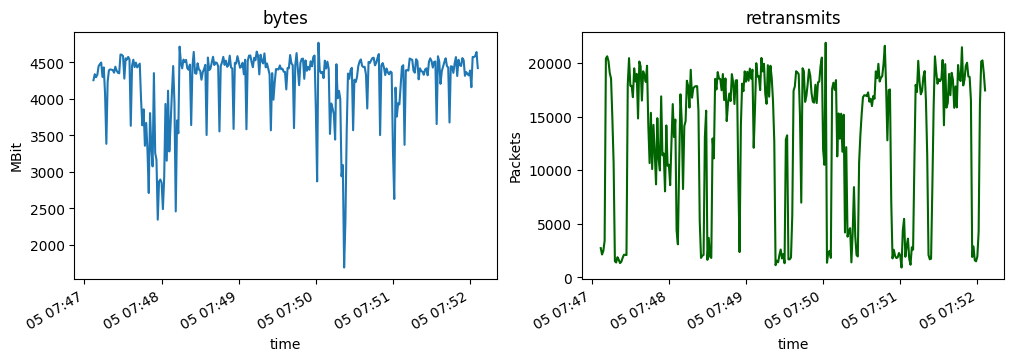

,MBit,retransmits
count,300.000000,300.000000
mean,4228.031645,13008.270000
std,486.577633,6792.046688
min,1687.312012,902.000000
25%,4260.215500,5672.250000
50%,4414.862732,16272.000000
75%,4498.170197,18418.250000
max,4768.519226,21897.000000


In [44]:
print("no drop, server bbr, client bbr")
showIperf(parseIperfFile('results/iperf/iperf_no_drop/server_bbr.client_bbr.json'))

no drop, server cubic, client cubic


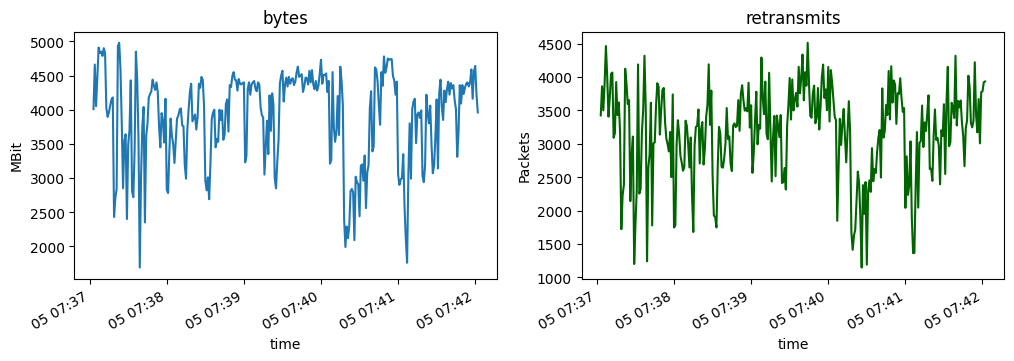

,MBit,retransmits
count,300.000000,300.000000
mean,3891.177282,3167.096667
std,665.203625,679.926251
min,1690.000000,1148.000000
25%,3497.500000,2722.000000
50%,4060.000000,3270.500000
75%,4400.000000,3643.750000
max,4979.914856,4514.000000


In [45]:
print("no drop, server cubic, client cubic")
showIperf(parseIperfFile('results/iperf/iperf_no_drop/server_cubic.client_cubic.json'))

20% drop, server bbr, client bbr


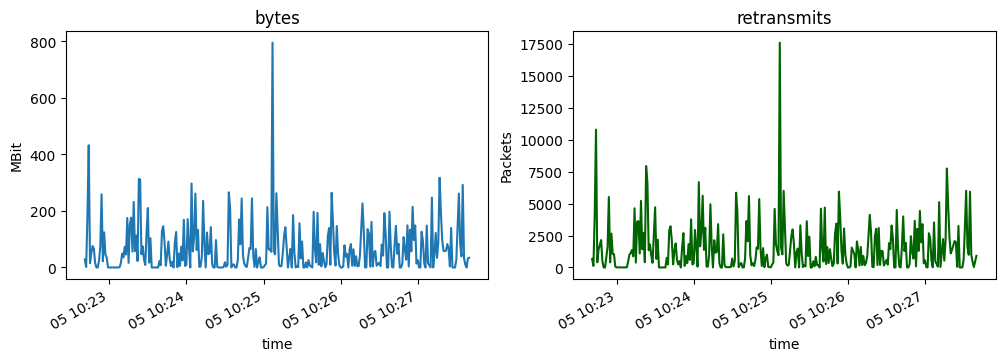

,MBit,retransmits
count,300.000000,300.000000
mean,66.040336,1516.473333
std,88.367648,1962.449054
min,0.000000,0.000000
25%,3.366684,146.250000
50%,35.411255,926.500000
75%,92.496552,2149.750000
max,795.409729,17598.000000


In [46]:
print("20% drop, server bbr, client bbr")
showIperf(parseIperfFile('results/iperf/results_0.2_drop/server_bbr.client_bbr.json'))

20% drop, server bbr, client bbr


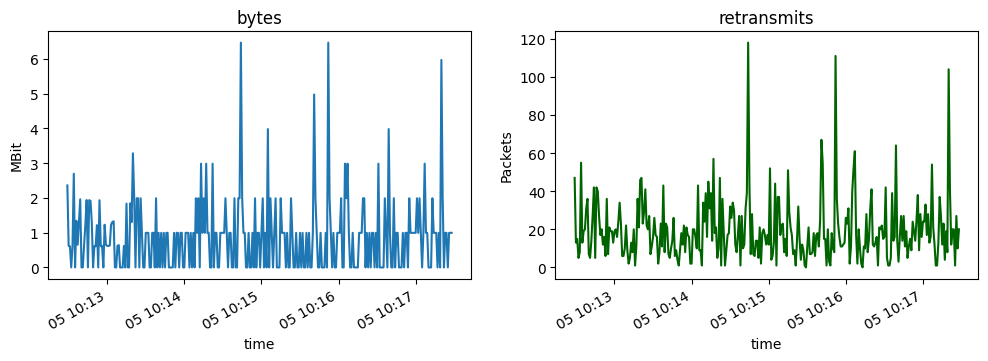

,MBit,retransmits
count,300.000000,300.00000
mean,0.867233,19.39000
std,1.016736,16.15574
min,0.000000,0.00000
25%,0.000000,9.00000
50%,0.994263,16.00000
75%,0.994263,25.00000
max,6.462708,118.00000


In [47]:
print("20% drop, server bbr, client bbr")
showIperf(parseIperfFile('results/iperf/results_0.2_drop/server_cubic.client_cubic.json'))


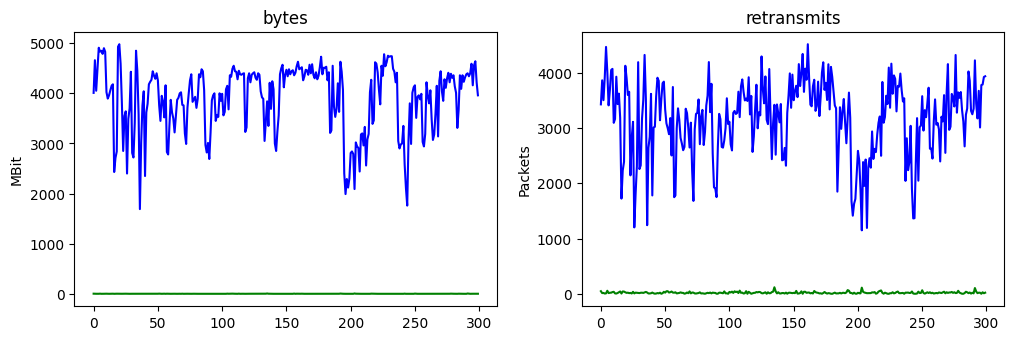

MBit              retransmits             
          self        other        self        other
mean  0.867233  3891.177282    19.39000  3167.096667
std   1.016736   665.203625    16.15574   679.926251
min   0.000000  1690.000000     0.00000  1148.000000
25%   0.000000  3497.500000     9.00000  2722.000000
50%   0.994263  4060.000000    16.00000  3270.500000
75%   0.994263  4400.000000    25.00000  3643.750000
max   6.462708  4979.914856   118.00000  4514.000000

In [67]:
compareIperfs(parseIperfFile('results/iperf/results_0.2_drop/server_cubic.client_cubic.json'), parseIperfFile('results/iperf/iperf_no_drop/server_cubic.client_cubic.json'))


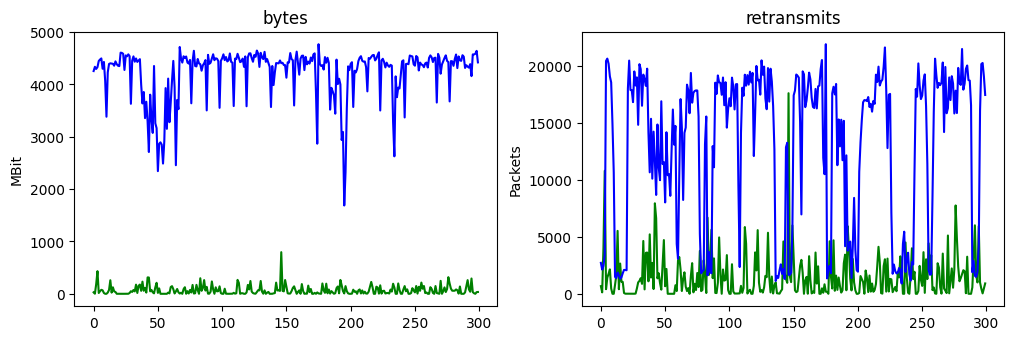

MBit                retransmits              
            self        other          self         other
mean   66.040336  4228.031645   1516.473333  13008.270000
std    88.367648   486.577633   1962.449054   6792.046688
min     0.000000  1687.312012      0.000000    902.000000
25%     3.366684  4260.215500    146.250000   5672.250000
50%    35.411255  4414.862732    926.500000  16272.000000
75%    92.496552  4498.170197   2149.750000  18418.250000
max   795.409729  4768.519226  17598.000000  21897.000000

In [70]:
compareIperfs(parseIperfFile('results/iperf/results_0.2_drop/server_bbr.client_bbr.json'), parseIperfFile('results/iperf/iperf_no_drop/server_bbr.client_bbr.json'))
